# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [22]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set data directory
dir_data = 'D:\Document\AI\Marathon100D\Assignment\Day_013\data'

### 之前做過的處理

In [30]:
# Set the full data file name
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))

# Read the csv data file
app_train = pd.read_csv(f_app)

# Print first few rows ( default to be 5 rows) of data
app_train.head()

Path of read in data: D:\Document\AI\Marathon100D\Assignment\Day_013\data\application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
# Declare encoder
le = LabelEncoder()

# 檢查每一個 column
# Loop through all columns
for col in app_train:
    # If the data type of column is object
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        # If the unique value of the column is smaller or equal to two
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            # Transform the data using encoder ( replace the data value to 0 or 1)
            app_train[col] = le.fit_transform(app_train[col])   
            
# Print the row count and column count
print(app_train.shape)

# List a few rows of the data fram
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# Convert DAYS_BIRTH to Years of birth
app_train['YEARS_BIRTH'] = abs(app_train['DAYS_BIRTH']/365)

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

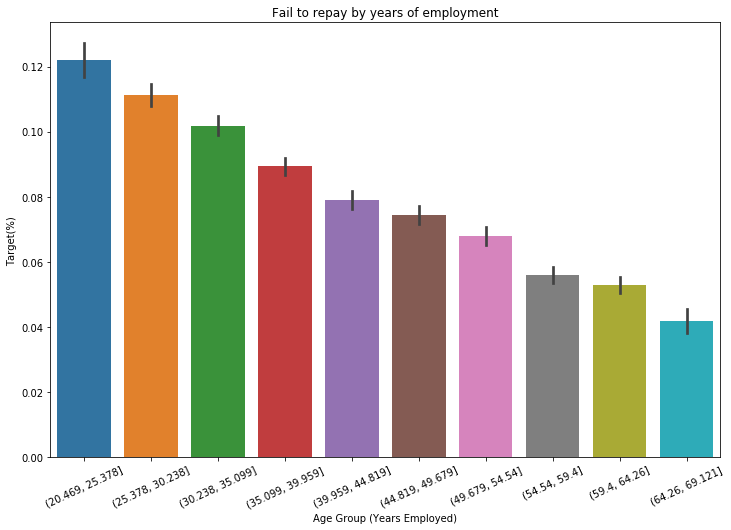

In [38]:
# Create a new column based on cutting the age column into 10 buckets of even width
app_train["equal_width_years_birth"] = pd.cut(app_train['YEARS_BIRTH'], 10)
# Count the value of each bucket (by even width)
# app_train["equal_width_years_birth"].value_counts() # 每個 bin 的值的範圍大小都是一樣的

# Set chart size
plt.figure(figsize = (12, 8))

# X axis = app_train["equal_width_years_birth"]
px = app_train["equal_width_years_birth"]

# Y axis = ["TARGET"]
py = app_train["TARGET"]
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 25);
plt.xlabel('Age Group (Years Employed)'); 
plt.ylabel('Target(%)')
plt.title('Fail to repay by years of employment');

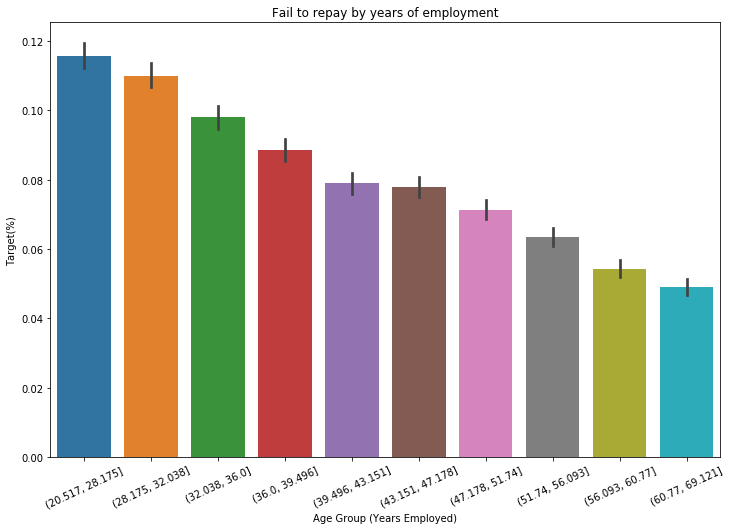

In [39]:
# Create a new column based on cutting the age column into 4 buckets with even frequency
app_train["equal_freq_years_birth"] = pd.qcut(app_train['YEARS_BIRTH'], 10)

# Count the value of each bucket ( by even frequncy )
# app_train["equal_freq_years_birth"].value_counts() # 每個 bin 的資料筆數是一樣的
# Set chart size
plt.figure(figsize = (12, 8))

# X axis = app_train["equal_freq_years_birth"]
px = app_train["equal_freq_years_birth"]

# Y axis = ["TARGET"]
py = app_train["TARGET"]
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 25);
plt.xlabel('Age Group (Years Employed)'); 
plt.ylabel('Target(%)')
plt.title('Fail to repay by years of employment');